<a href="https://colab.research.google.com/github/mseyfi/DeepLearning/blob/master/TF2_0_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Linear Classification (logestic Regression)
#It is not ok to use softmax and sigmoid in case of binary classification interchangably. we can use softmax with N = 2 and sigmoid with N =1

import numpy as np
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 2.x
import tensorflow as tf

(569, 30)
Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.8201 - accuracy: 0.5092 - val_loss: 0.7214 - val_accuracy: 0.6330
Epoch 2/100
381/381 [==============================] - 0s 181us/sample - loss: 0.7369 - accuracy: 0.5669 - val_loss: 0.6477 - val_accuracy: 0.6596
Epoch 3/100
381/381 [==============================] - 0s 149us/sample - loss: 0.6633 - accuracy: 0.6115 - val_loss: 0.5837 - val_accuracy: 0.7181
Epoch 4/100
381/381 [==============================] - 0s 177us/sample - loss: 0.6024 - accuracy: 0.6640 - val_loss: 0.5276 - val_accuracy: 0.7713
Epoch 5/100
381/381 [==============================] - 0s 171us/sample - loss: 0.5494 - accuracy: 0.7139 - val_loss: 0.4804 - val_accuracy: 0.8032
Epoch 6/100
381/381 [==============================] - 0s 155us/sample - loss: 0.5060 - accuracy: 0.7559 - val_loss: 0.4396 - val_accuracy: 0.8351
Epoch 7/100
381/381 [==============================] - 0s 150us/

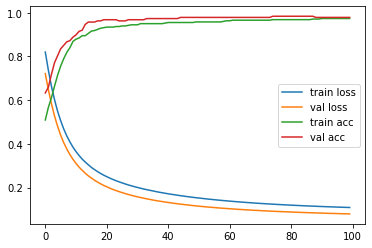

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
print(data.data.shape)
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)

N = 1
activation = ['sigmoid', 'softmax']
if N == 2:
  Y_train = np.array([[p, 1-p] for p in Y_train]).reshape(-1, 2)
  Y_test = np.array([[p, 1-p] for p in Y_test]).reshape(-1,2)


scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(X_train.shape[1],)), tf.keras.layers.Dense(N,activation=activation[N-1])])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100)

print('Train loss {:.2f} acc {:.2f}'.format(model.evaluate(X_train, Y_train)[0], model.evaluate(X_train, Y_train)[1]))
print('Test: loss {:.2f} acc {:.2f}'.format(model.evaluate(X_test, Y_test)[0], model.evaluate(X_test, Y_test)[1]))

plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')


plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
 

if N == 2:
  print('*************************************************')
  z = [a[0] + a[1] for a in model.predict(X_test)]
  plt.figure()
  plt.plot(z)
  print('*************************************************')


